**Import Necessary Libraries**

In [1]:
# Import necessary libraries
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.colors import rgb2hex
import matplotlib.cm as cm
import plotly.express as px
import plotly.graph_objects as go
import squarify
from plotly.offline import init_notebook_mode,iplot
from wordcloud import WordCloud
from PIL import Image
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.colors
from collections import Counter
cmap2 = plt.colormaps.get_cmap('twilight').resampled(13)
colors1= []
for i in range(cmap2.N):
    rgb= cmap2(i)[:4]
    colors1.append(rgb2hex(rgb))
    #print(rgb2hex(rgb))
# Set style
sns.set(style='whitegrid')

**Load the Data**

In [2]:
# Read directly from GitHub raw URL
import pandas as pd
url = 'https://raw.githubusercontent.com/Pikachu0405/Project-Netflix-/main/netflix_titles.csv'
df = pd.read_csv(url, low_memory=False)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# Get more information about your data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
#Missing Values in each column
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
#Count of data records in each column
df.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [6]:
# Unique Values for the type of shows on netflix
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [7]:
# Unique values for the rating
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

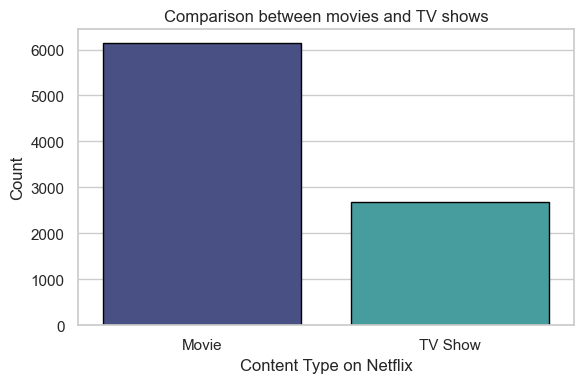

In [8]:
# Comparison between movies and Tv Shows
n_shows = df[df['type']=='TV Show']
n_movies = df[df['type']=='Movie']
# plot
plt.figure(figsize=(6,4),dpi=100)
ax=sns.countplot(x='type',data=df,palette='mako', hue='type', legend=False, linewidth=1,edgecolor='black')
plt.xlabel("Content Type on Netflix")
plt.ylabel('Count')
plt.title('Comparison between movies and TV shows')
plt.tight_layout()
plt.show()

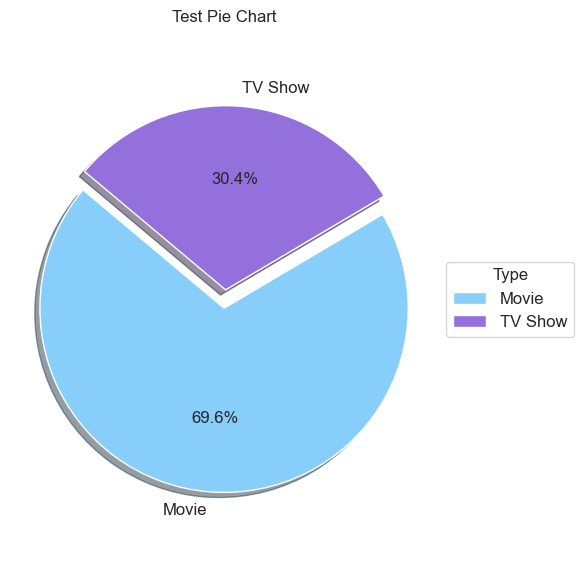

In [9]:
#Percent Distribution
ng_type = df['type'].value_counts().reset_index()
#ng_type = ng_type.rename(columns = {'type': 'count', 'index':'type', })
ng_type.columns = ['type', 'count']

#t = go.Pie(values=ng_type['count'],labels=ng_type['type'],marker=dict(colors=['LightSkyBlue','MediumPurple']))
#layout = go.Layout(height=500,legend=dict(x=0.1,y=1.1))
#fig = go.Figure(data=[t],layout=layout)
#iplot(fig)

plt.figure(figsize=(6,6))
explode = (0.05, 0.05)
wedges, labels, autotexts = plt.pie(ng_type['count'], labels=ng_type['type'], autopct='%1.1f%%', colors=['LightSkyBlue', 'MediumPurple'], startangle=140, explode=explode,
    shadow=True, textprops={'fontsize': 12})
plt.axis('equal')
plt.title('Test Pie Chart')
plt.legend(wedges, ng_type['type'], title="Type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)
plt.tight_layout()
plt.show()


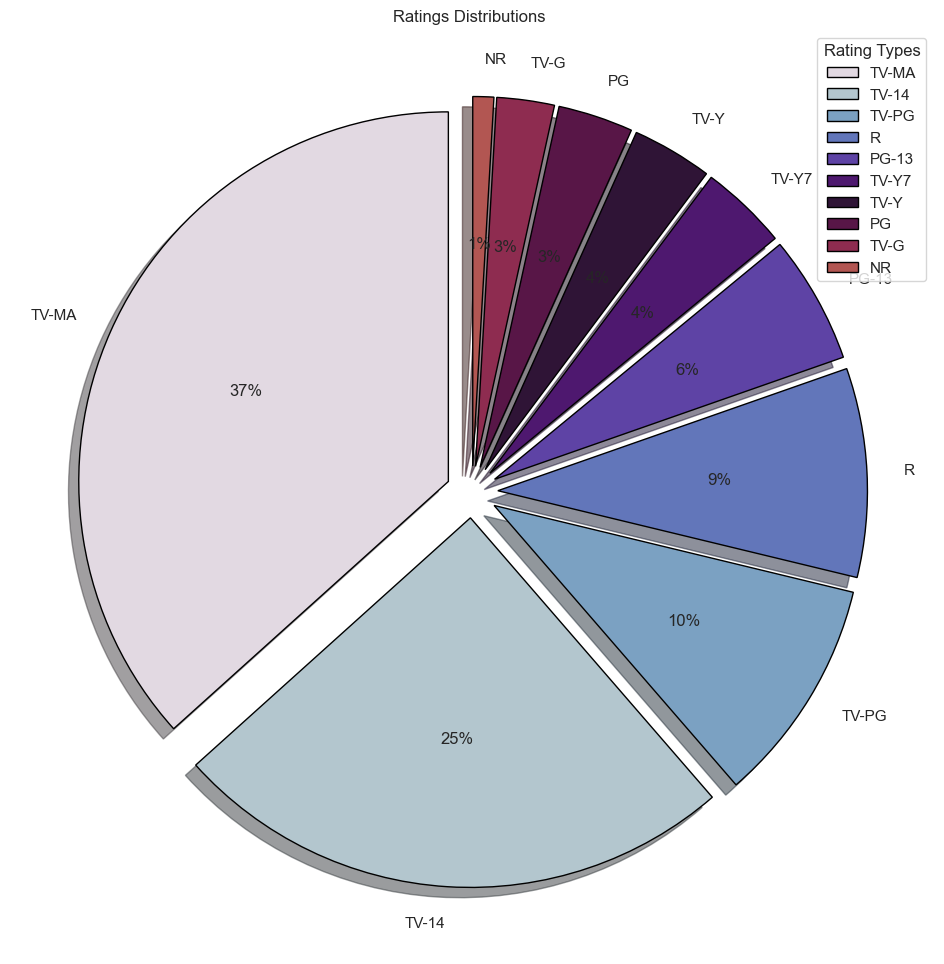

In [10]:
# Distribution of Ratings 
plt.figure(figsize=(18,12))
p_ratings = df['rating'].value_counts().head(10)
plt.pie(x=p_ratings,labels=p_ratings.index,colors=colors1,autopct='%.0f%%',explode=[0.07 for i in p_ratings.index],startangle=90,wedgeprops={'linewidth':1,'edgecolor':'black'},shadow=True)
plt.title('Ratings Distributions ')
plt.legend(loc='upper right',title='Rating Types')

plt.show()

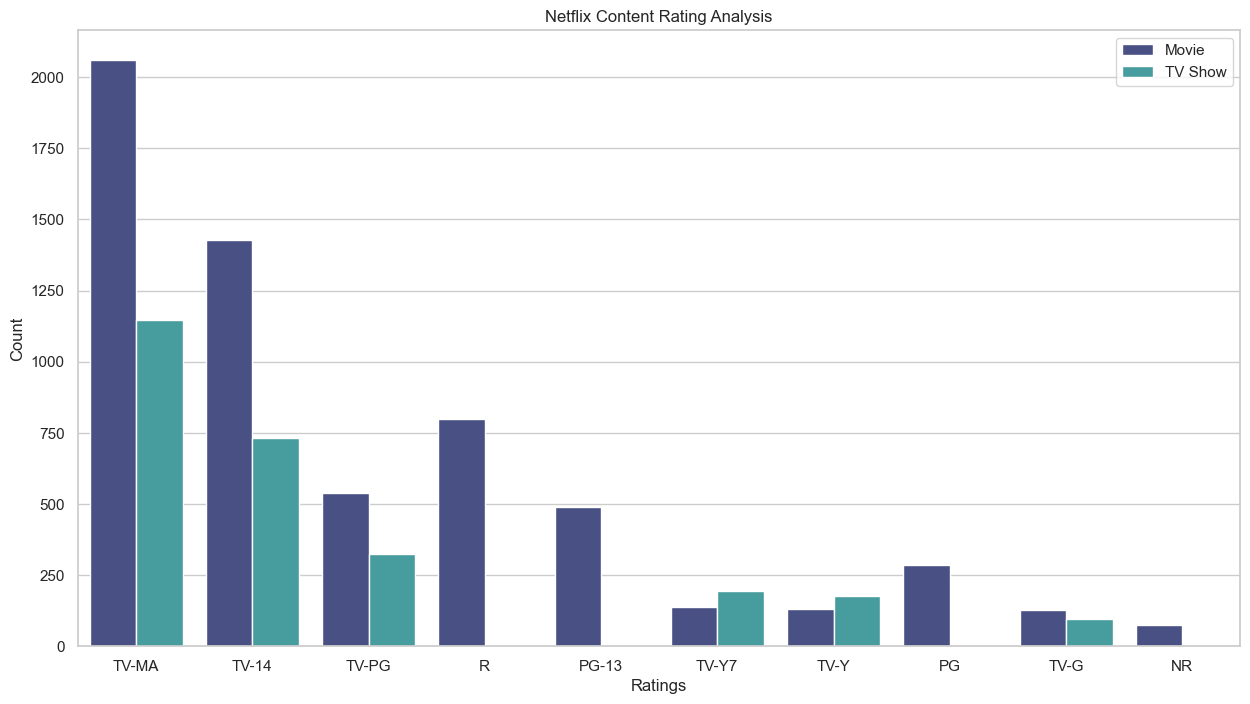

In [11]:
# Ratings Analysis
plt.figure(figsize=(15,8))
sns.countplot(x='rating',data=df,palette='mako',hue ='type',order=df['rating'].value_counts().index[0:10])
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.legend()
plt.title('Netflix Content Rating Analysis')

plt.show()

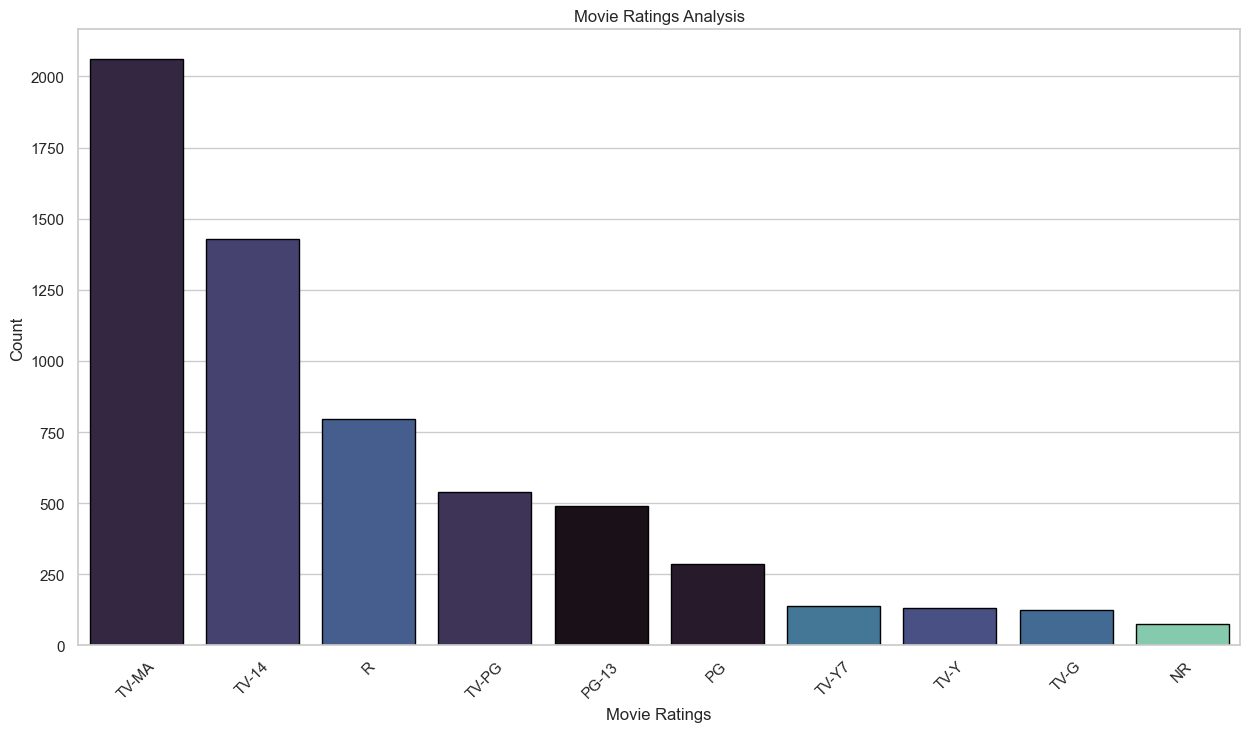

In [12]:
# Movies Ratings Analysis
plt.figure(figsize=(15,8))
sns.countplot(x='rating',data=n_movies,palette='mako', hue='rating', order=n_movies['rating'].value_counts().index[0:10],edgecolor='black', legend=False)
plt.xlabel('Movie Ratings')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title("Movie Ratings Analysis")

plt.show()

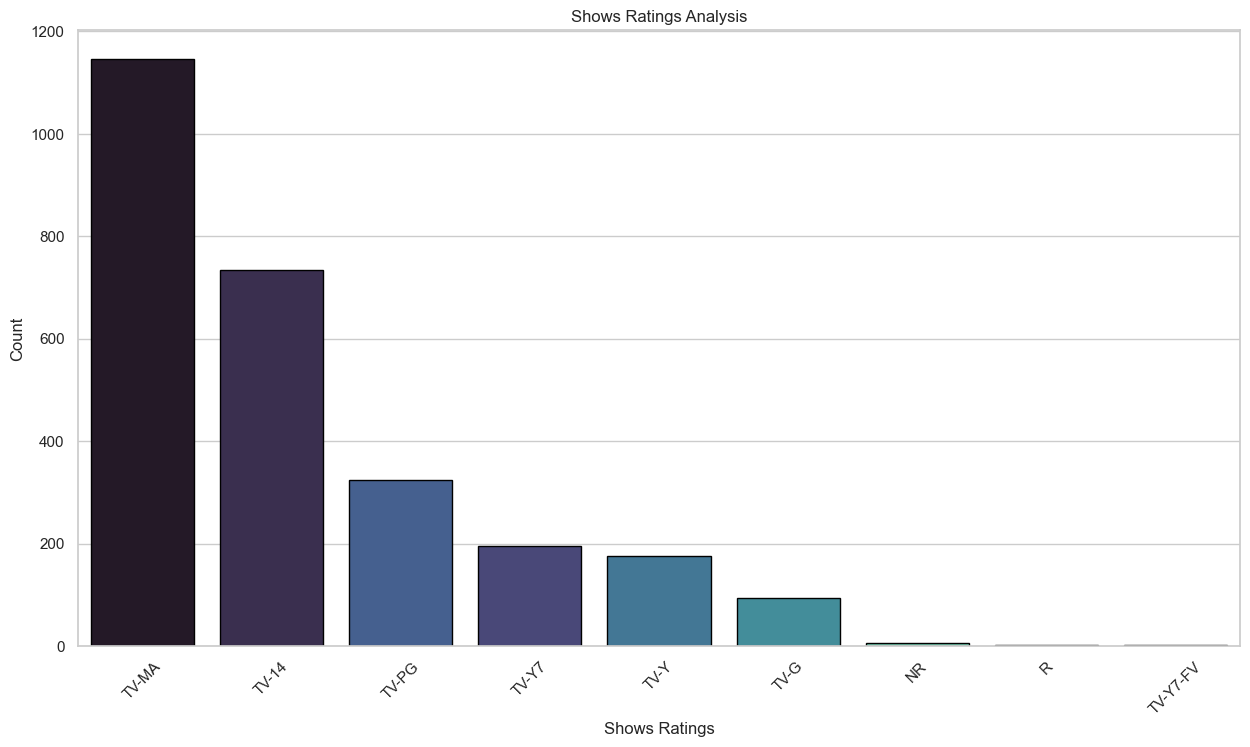

In [13]:
# Show Ratings Analysis
plt.figure(figsize=(15,8))
sns.countplot(x='rating',data=n_shows,palette='mako', hue='rating', order=n_shows['rating'].value_counts().index[0:10],edgecolor='black', legend=False)
plt.xlabel('Shows Ratings')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title("Shows Ratings Analysis")

plt.show()

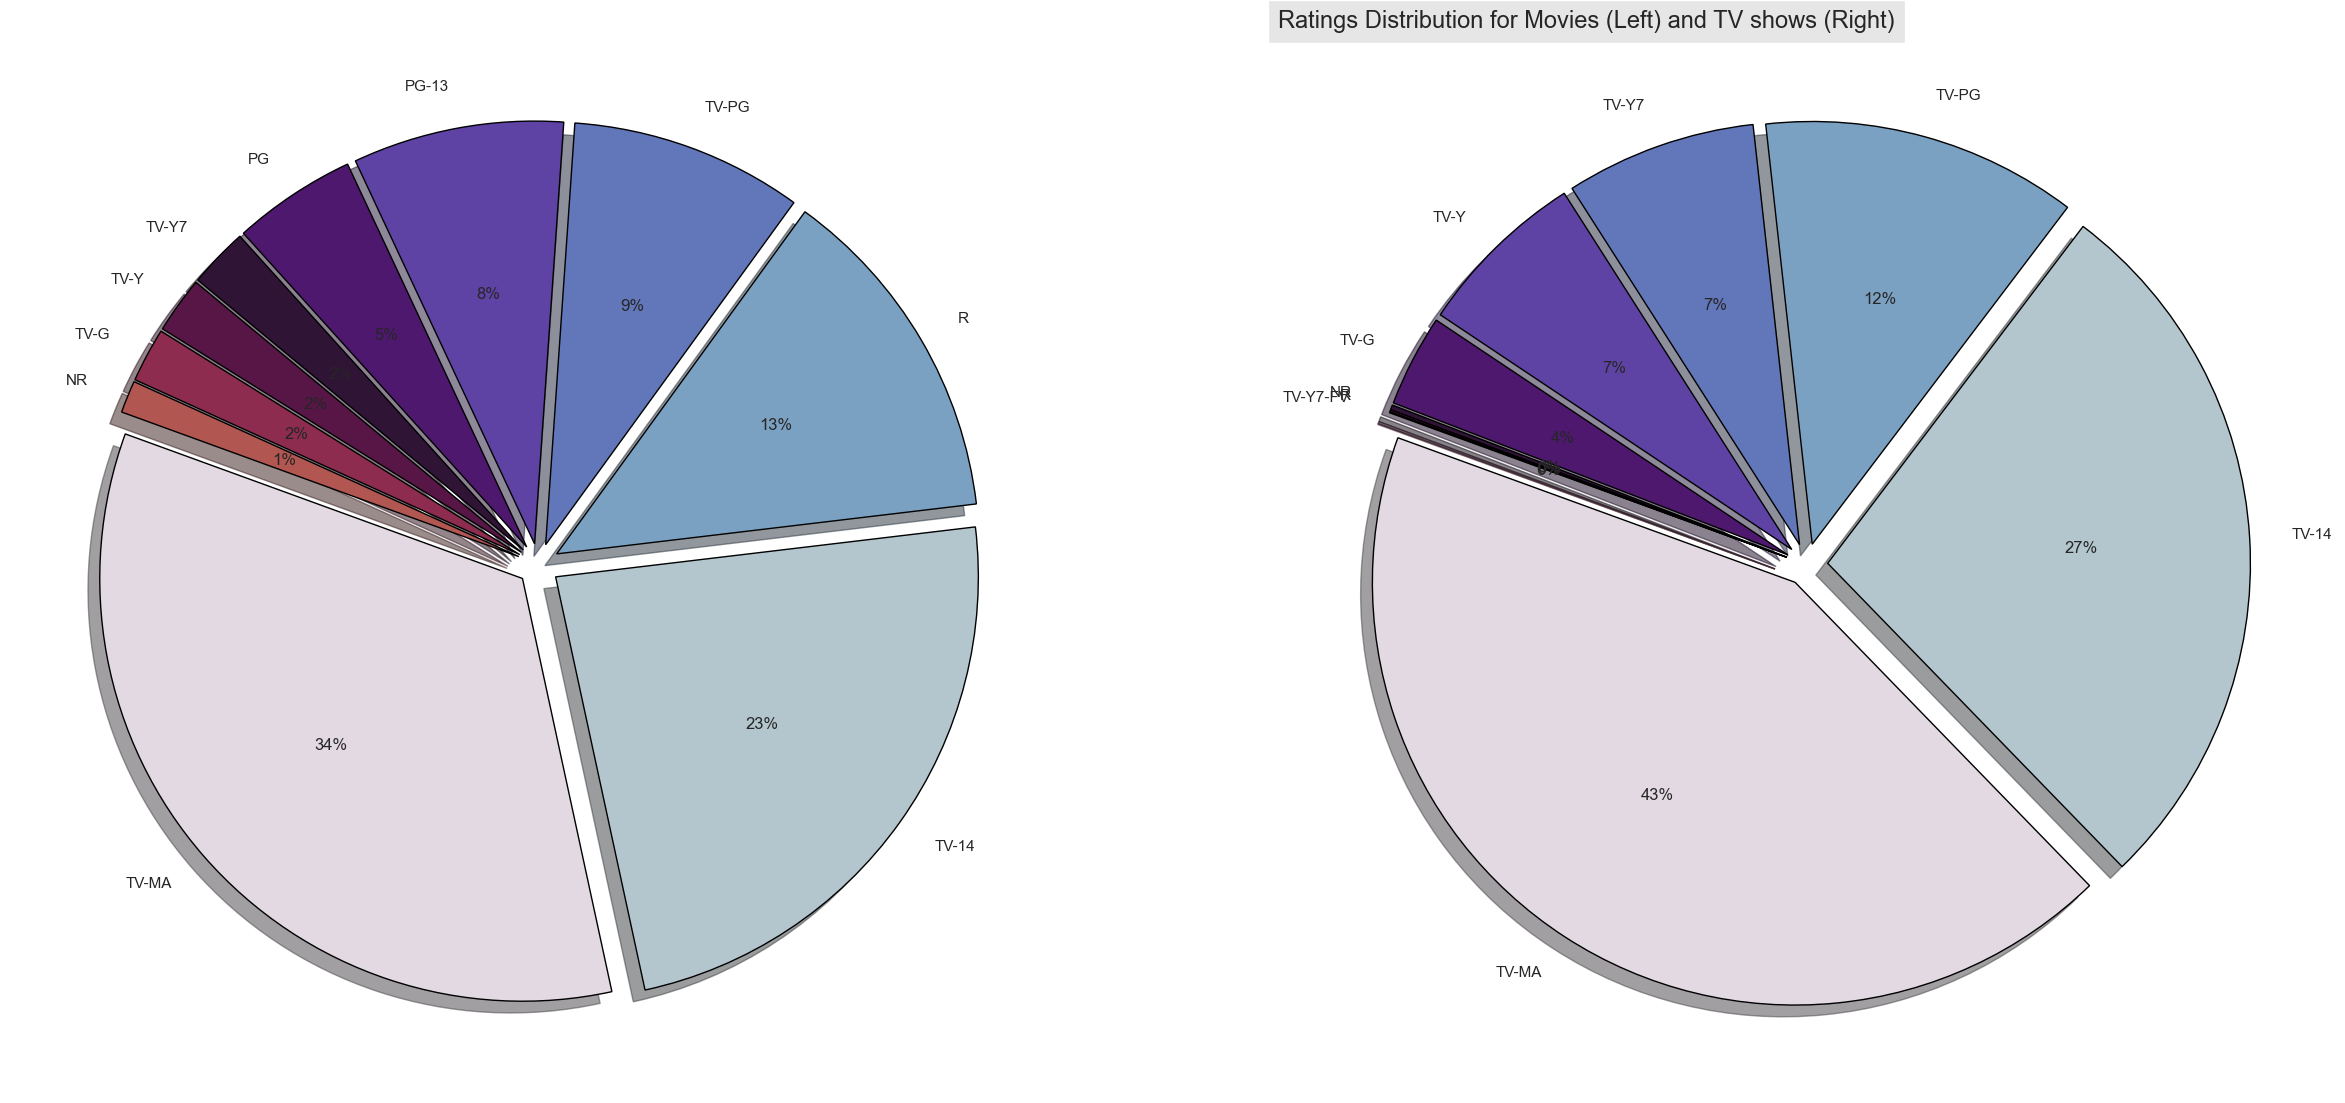

In [14]:
# Movies vs TV shows
fig,(ax0,ax1)=plt.subplots(1,2,figsize=(30,18))
np_movies = n_movies['rating'].value_counts().head(10)
np_shows = n_shows['rating'].value_counts().head(10)
ax0.pie(x=np_movies,labels=np_movies.index,colors=colors1,autopct='%.0f%%',explode=[0.05 for i in np_movies.index],startangle=160,wedgeprops={'linewidth':1,'edgecolor':'black'},shadow=True)
plt.title('Ratings Distribution for Movies (Left) and TV shows (Right)',bbox={'facecolor':'0.9','pad':5},loc='left',fontsize=17)
ax1.pie(x=np_shows,labels=np_shows.index,colors=colors1,autopct='%.0f%%',explode=[0.05 for i in np_shows.index],startangle=160,wedgeprops={'linewidth':1,'edgecolor':'black'},shadow=True)

plt.show()

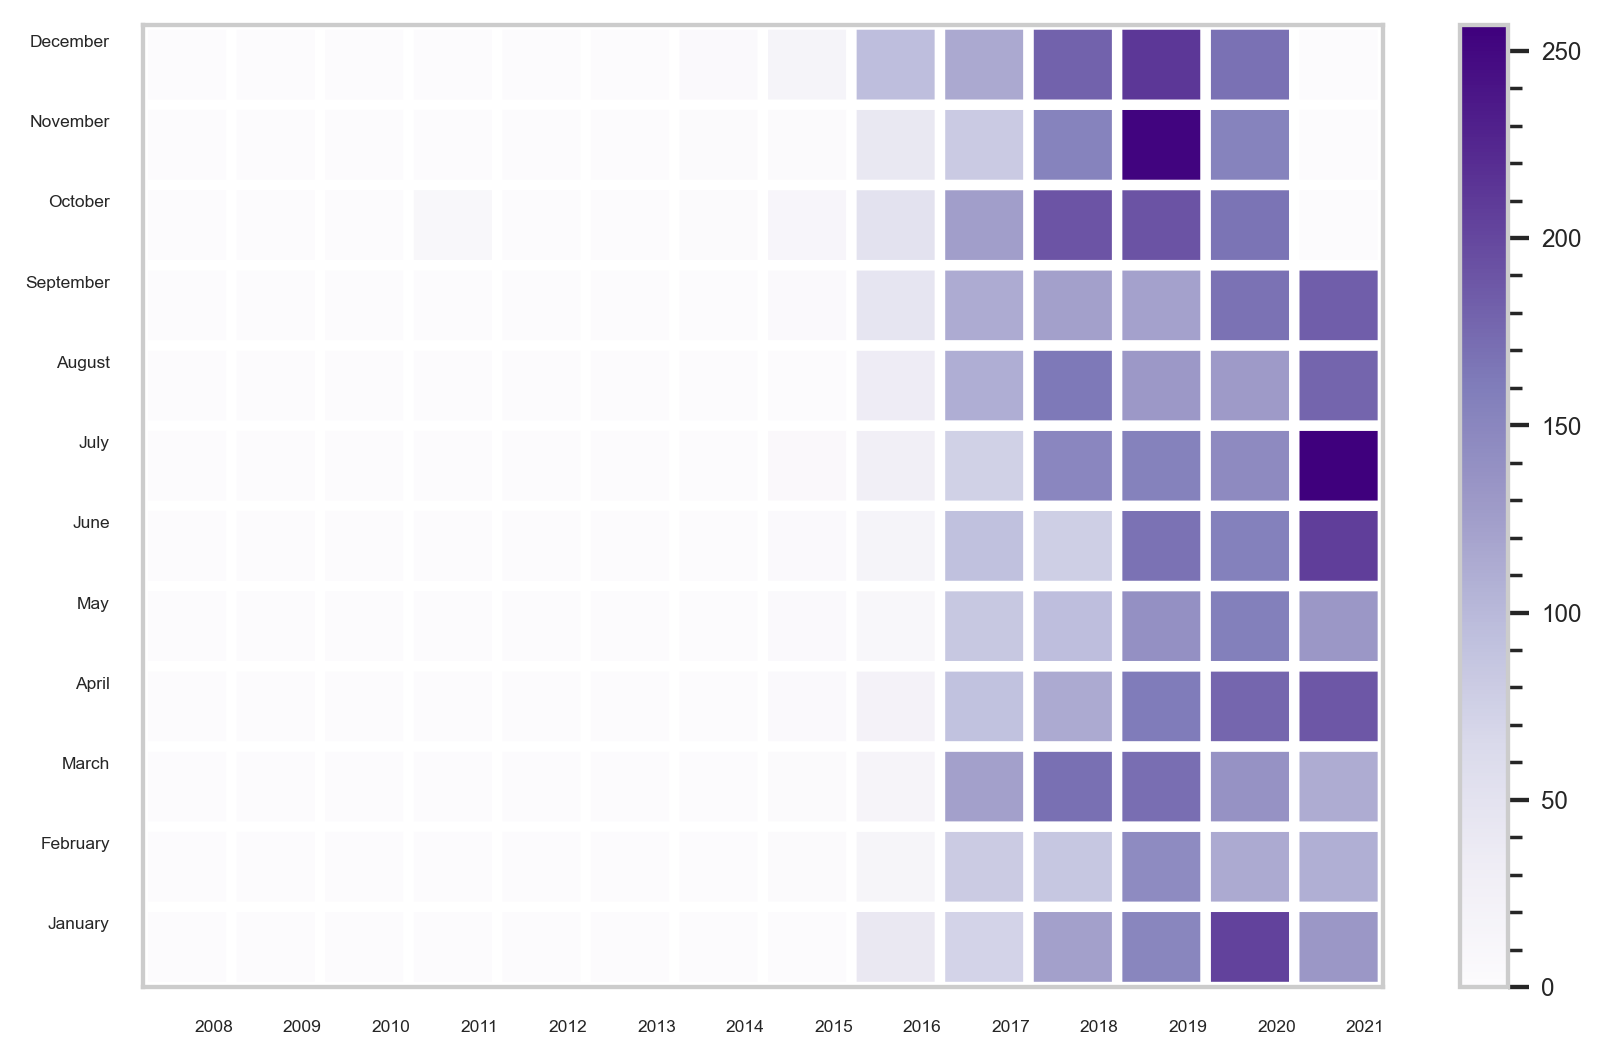

In [15]:
# Month when content can be released
n_date=df[['date_added']].dropna()
n_date['year']= n_date['date_added'].apply(lambda x: x.split(', ')[-1])
n_date['month'] = n_date['date_added'].apply(lambda x:x.split(' ')[0])
month_list = ['January','February','March','April','May','June','July','August','September','October','November','December']
g_df= n_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_list].T
# plot
plt.figure(figsize=(8,5),dpi=250)
plt.pcolor(g_df,cmap='Purples',edgecolors='white',linewidths=3)
plt.xticks(np.arange(0.8,len(g_df.columns),1),g_df.columns,fontsize=5)
plt.yticks(np.arange(0.8,len(g_df.index),1),g_df.index,fontsize=5)
cbar=plt.colorbar()
cbar.ax.tick_params(labelsize=7)
cbar.ax.minorticks_on()

plt.show()

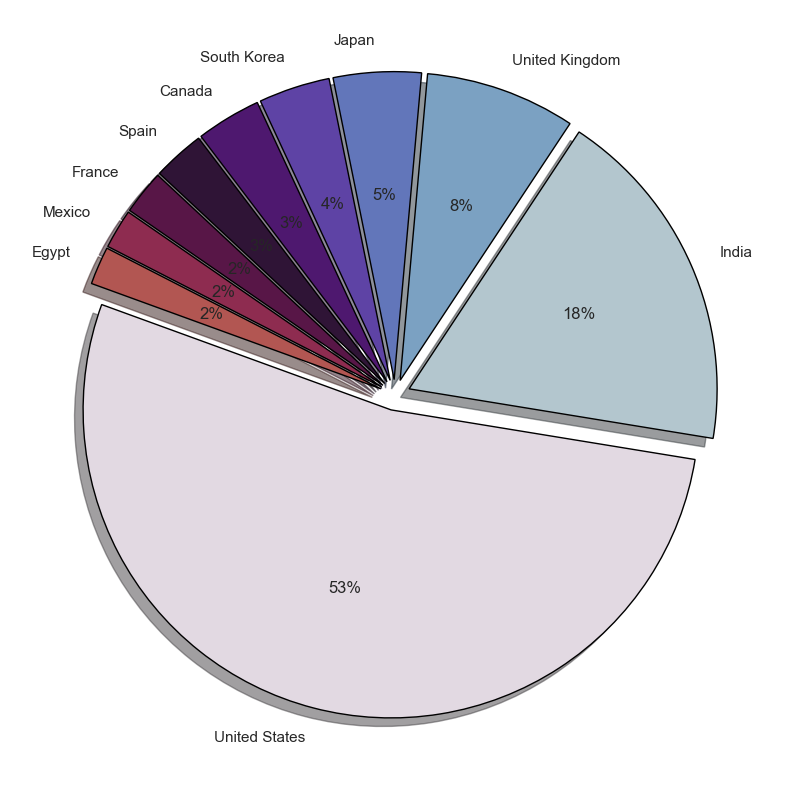

In [16]:
# Top 10 countries
df['country'] = df.country.dropna()
n_countries = df.country.value_counts().head(10)
# plot
plt.figure(figsize=(18,10))
plt.pie(x=n_countries,labels=n_countries.index,colors=colors1,autopct='%.0f%%',explode=[0.05 for i in n_countries.index],startangle=160,wedgeprops={'linewidth':1,'edgecolor':'black'},shadow=True)

plt.show()

In [17]:
# Which Country produces the most content
n_country = df['country'].dropna()
nc_country = pd.Series(dict(Counter(','.join(n_country).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)
#get top 15 countries
nc_country[:15]

United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
China              162
Australia          160
Egypt              117
Turkey             113
Hong Kong          105
dtype: int64

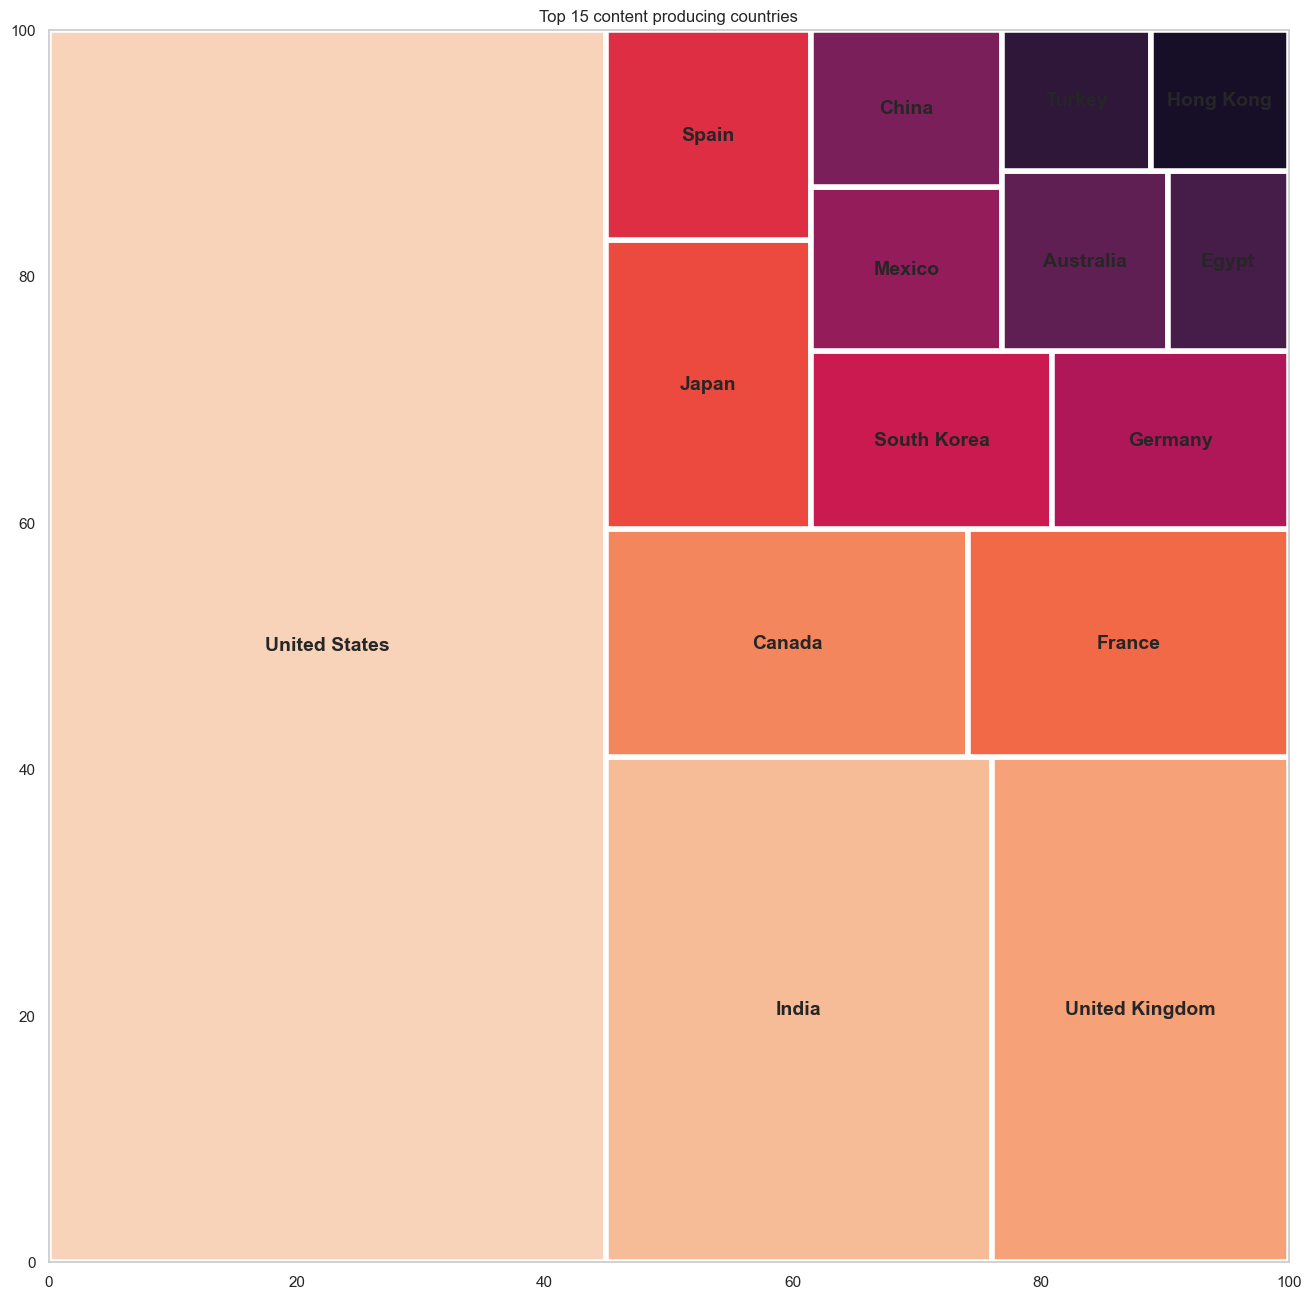

In [18]:
# Plot the top 15 countries
fig = plt.figure(figsize=(16,16))
t = nc_country[:15]
squarify.plot(sizes=t.values,label=t.index,color=sns.color_palette("rocket_r", n_colors=15),linewidth=4,text_kwargs={'fontsize':14,'fontweight':'bold'})
plt.title('Top 15 content producing countries')

plt.show()

There are 20 types


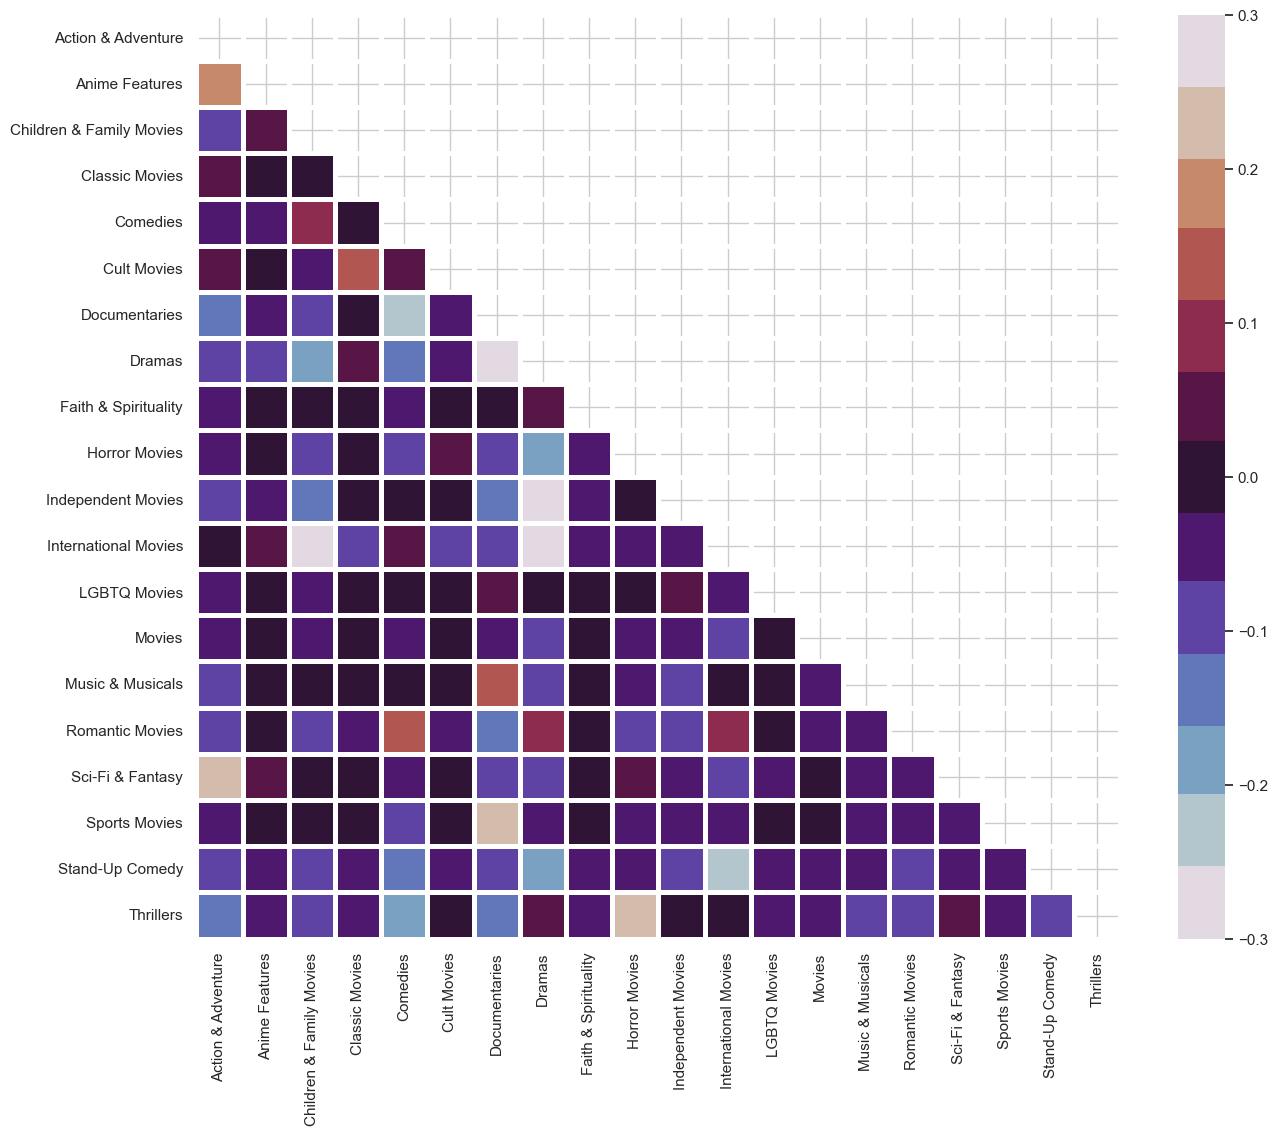

There are 22 types


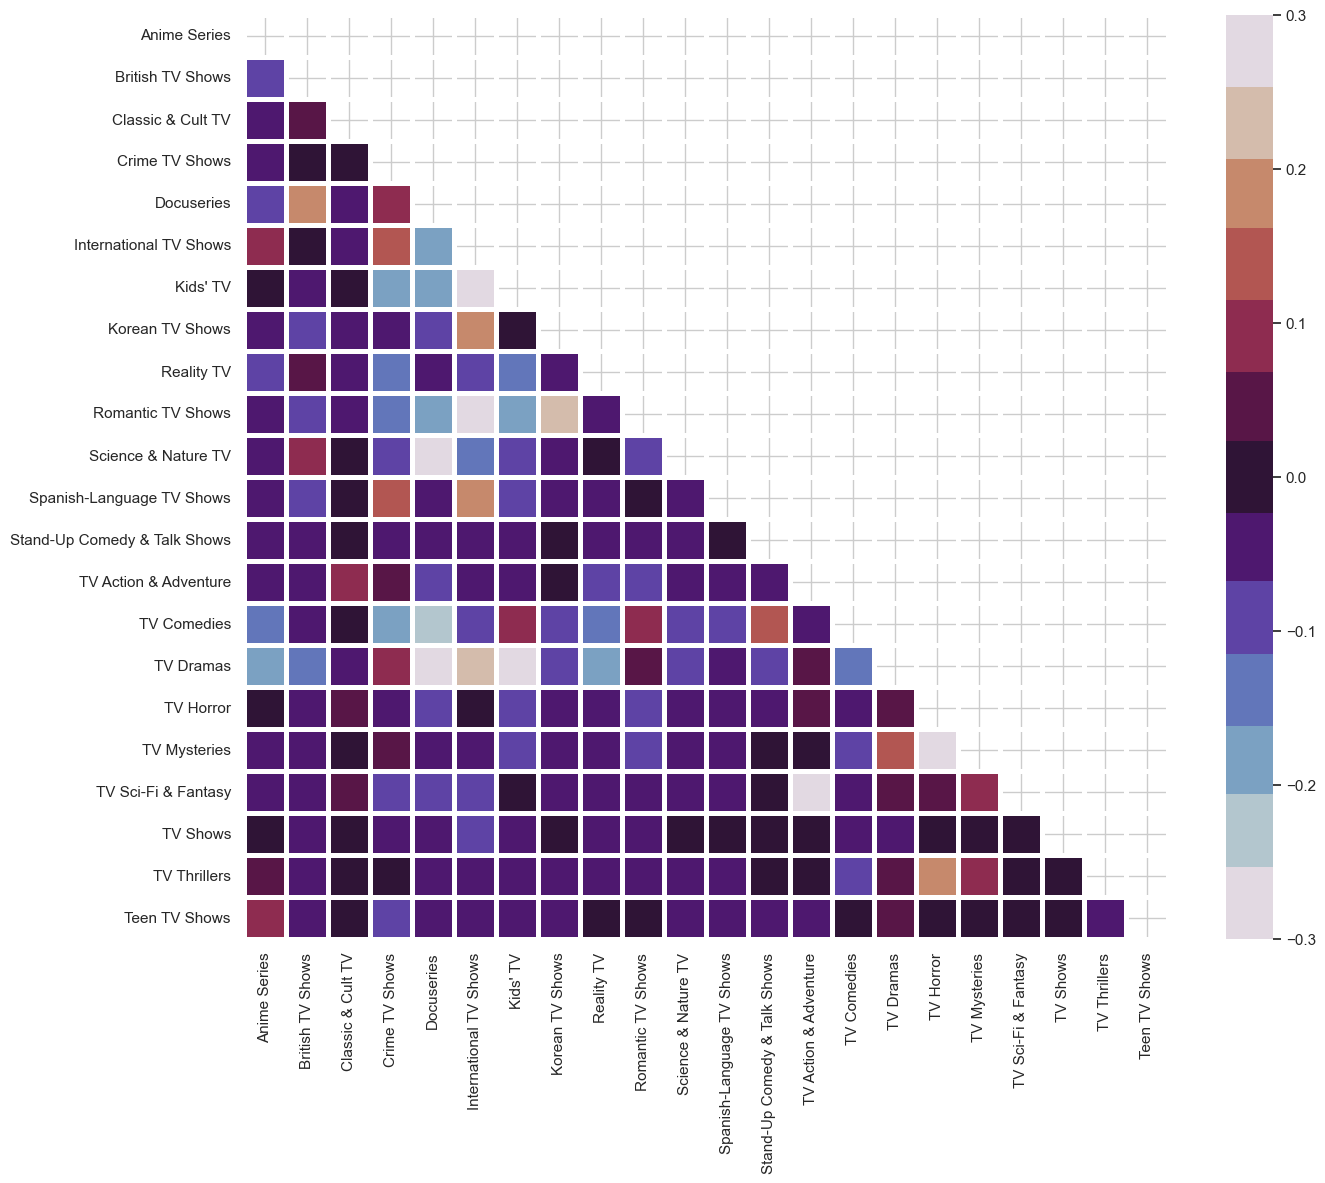

In [19]:
# Movies and Shows Genres
def g_heatmap(df, title):
    df=df.copy()
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print("There are {} types".format(len(Types),title))    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(15, 12))
   
    pl = sns.heatmap(corr, mask=mask, cmap=colors1, vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)
    
    plt.show()
g_heatmap(n_movies, 'Movie')
g_heatmap(n_shows,'Shows')

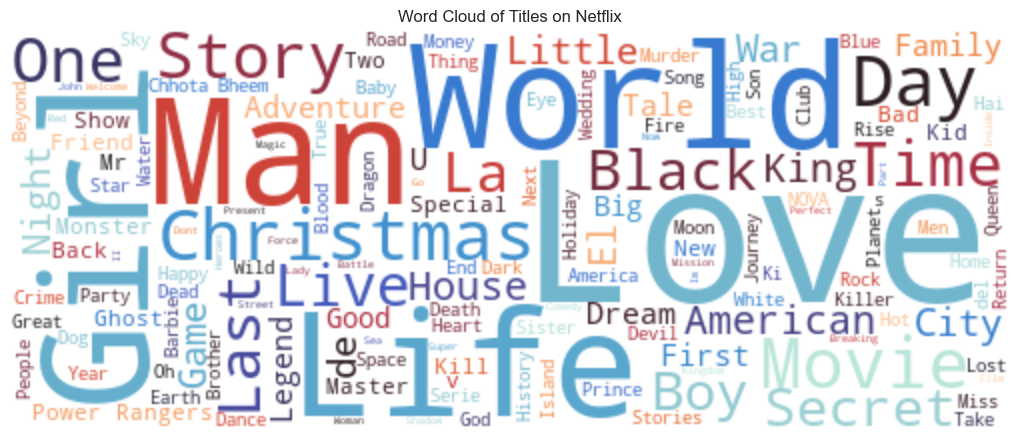

In [20]:
# Word Cloud of Titles
t = str(list(df['title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')
wc = WordCloud(background_color = 'white', width = 500,  height = 200,colormap='icefire', max_words = 150).generate(t)
plt.figure( figsize=(10,10))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Word Cloud of Titles on Netflix')

plt.show()

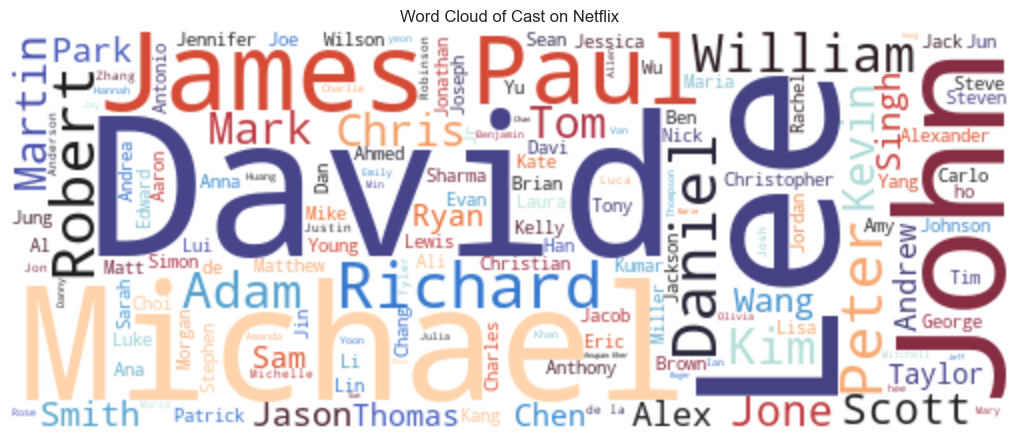

In [21]:
# Word Cloud for Cast
c_df = df[['cast']].dropna().copy()
t = str(list(c_df['cast'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')
wc = WordCloud(background_color = 'white', width = 500,  height = 200,colormap='icefire', max_words = 150).generate(t)
plt.figure( figsize=(10,10))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Word Cloud of Cast on Netflix')

plt.show()

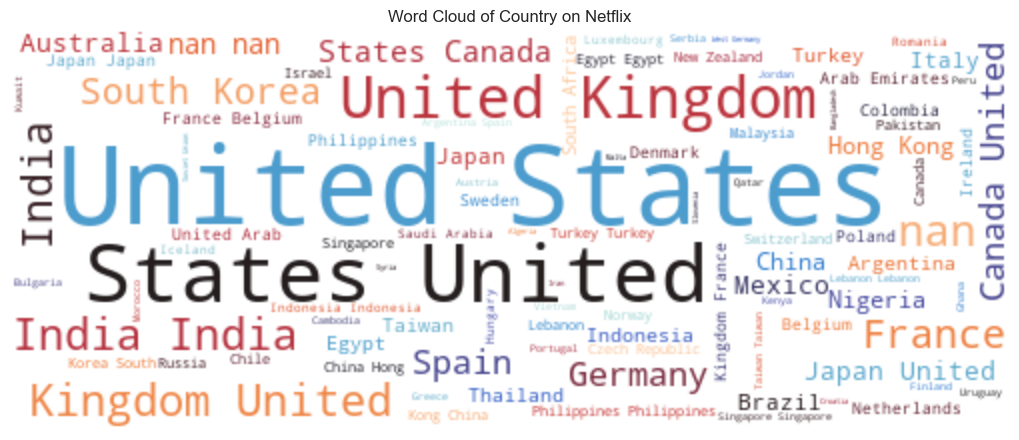

In [22]:
# Word Cloud for Country
c_df['country'] = df['country'].dropna()
t = str(list(c_df['country'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')
wc = WordCloud(background_color = 'white', width = 500,  height = 200,colormap='icefire', max_words = 150).generate(t)
plt.figure( figsize=(10,10))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Word Cloud of Country on Netflix')

plt.show()

/var/folders/t7/gqy65nf94hn_kpfg8pz1f9x40000gn/T/ipykernel_22165/434412432.py:3: UserWarning:


The palette list has fewer values (13) than needed (73) and will cycle, which may produce an uninterpretable plot.



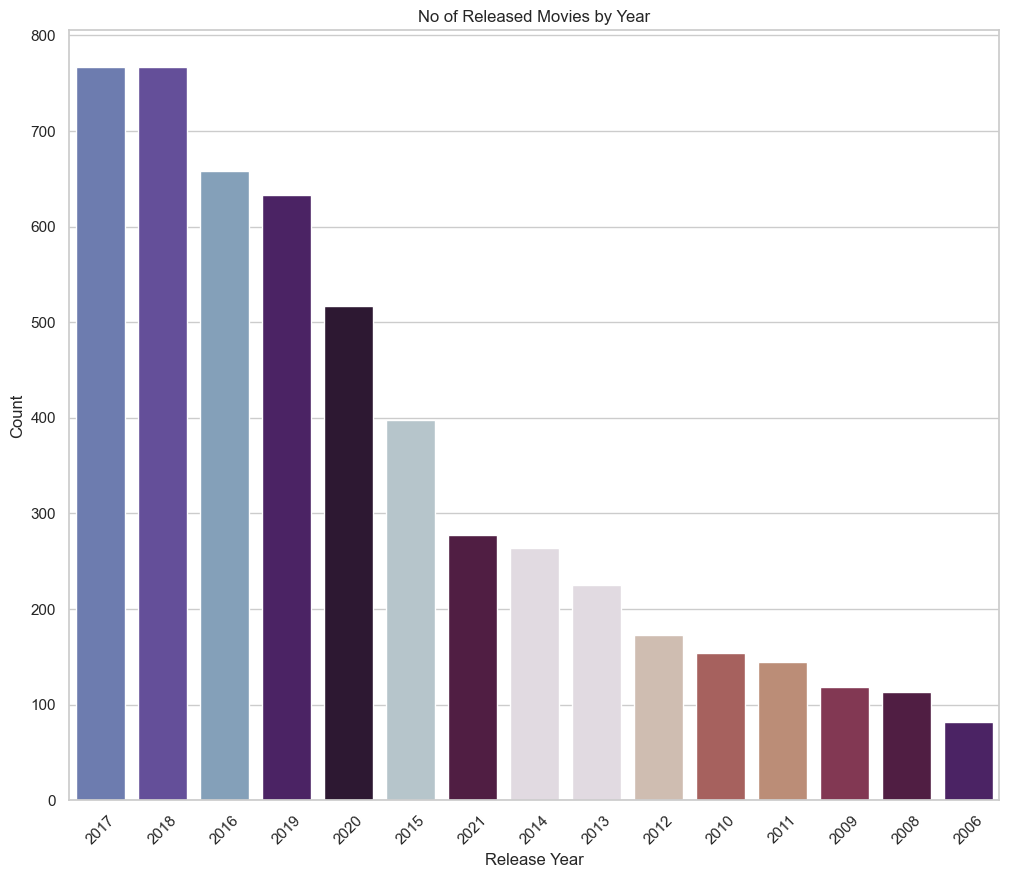

In [23]:
# Number of Released Movies by Year
plt.figure(figsize=(12,10))
sns.countplot(x='release_year', hue='release_year', data=n_movies,palette=colors1,order=n_movies['release_year'].value_counts().index[0:15], legend=False)
plt.title('No of Released Movies by Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

/var/folders/t7/gqy65nf94hn_kpfg8pz1f9x40000gn/T/ipykernel_22165/3664268473.py:3: UserWarning:


The palette list has fewer values (13) than needed (46) and will cycle, which may produce an uninterpretable plot.



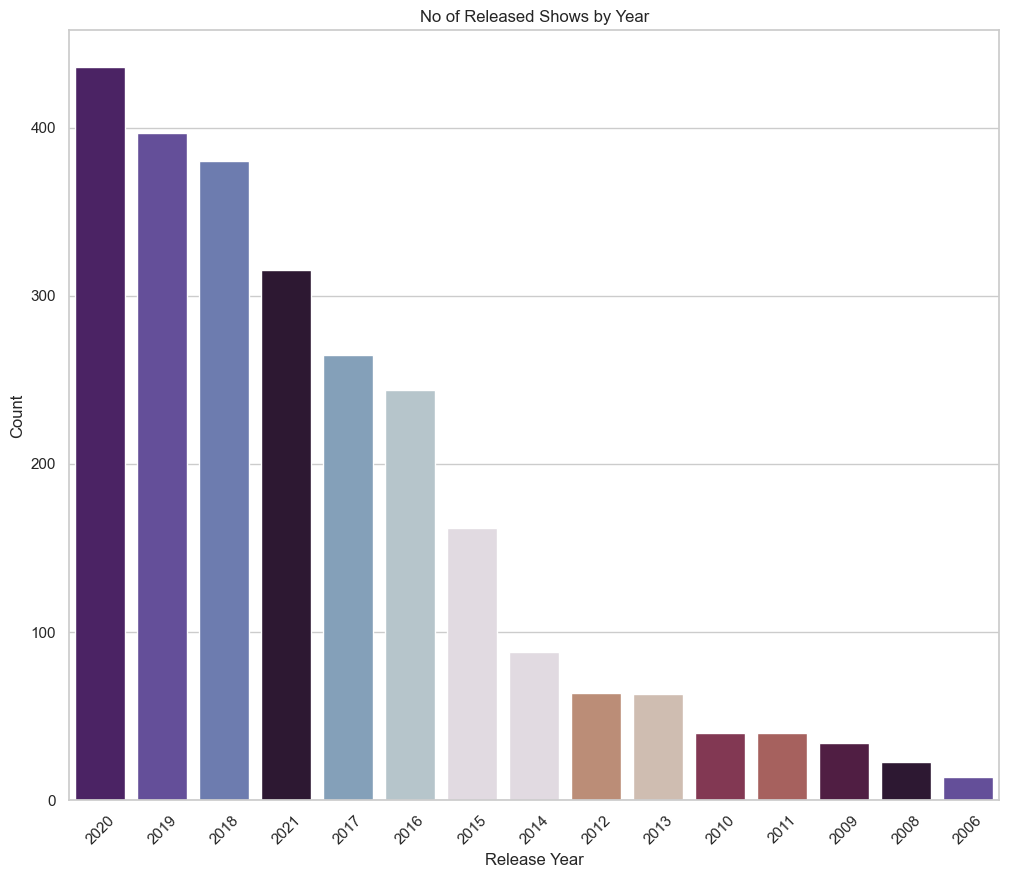

In [24]:
# Number of Released Shows by Year
plt.figure(figsize=(12,10))
sns.countplot(x='release_year',hue='release_year',data=n_shows,palette=colors1,order=n_shows['release_year'].value_counts().index[0:15],legend=False)
plt.title('No of Released Shows by Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()